In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv('data/training.csv')

In [3]:
data.head(5)

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

In [5]:
data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162,50.818889,...,-5.594141,-20.037576,-1.007121,-4.355657,-20.996919,-0.973737,-4.597626,-18.840000,-1.570808,-4.155859
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158,12.842321,...,9.769193,4.948562,1.783671,2.352311,6.490763,0.702619,1.736712,5.251095,1.807792,1.982423
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000,7.660000,...,-53.530000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000,40.667500,...,-6.627500,-23.325000,-1.860000,-5.790000,-24.090000,-1.290000,-5.747500,-22.237500,-2.370000,-5.122500
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000,53.030000,...,-2.255000,-20.020000,-0.970000,-4.350000,-20.465000,-0.945000,-4.540000,-19.200000,-1.420000,-4.125000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000,59.920000,...,0.247500,-17.787500,-0.042500,-2.882500,-17.955000,-0.642500,-3.617500,-16.227500,-0.655000,-3.105000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000,83.320000,...,5.740000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


In [6]:
np.unique(data['class'])

array(['d ', 'h ', 'o ', 's '], dtype=object)

We have 4 types of data, let's convert them to integers:
- 0 -> 'd '
- 1 -> 'h '
- 2 -> 'o '
- 3 -> 's '

In [7]:
dataLabel = data['class'].to_numpy()
dataLabel[dataLabel == 'd '] = 0
dataLabel[dataLabel == 'h '] = 1
dataLabel[dataLabel == 'o '] = 2
dataLabel[dataLabel == 's '] = 3
print(dataLabel)

[0 1 3 3 0 1 3 0 3 2 0 2 2 0 3 2 2 0 3 1 2 0 3 1 0 1 2 0 0 0 0 3 2 3 0 0 0
 1 2 0 0 0 3 3 1 0 0 2 0 3 0 3 3 1 1 3 2 0 1 1 0 2 2 2 1 3 1 0 0 1 2 2 2 3
 1 3 0 2 3 3 0 0 2 1 2 1 0 0 3 2 2 1 2 2 0 3 2 1 2 3 0 2 1 1 1 1 1 0 3 1 0
 0 0 0 1 2 3 1 3 3 3 3 2 3 1 3 1 3 1 0 3 3 2 3 1 3 2 3 0 3 3 1 3 1 3 0 0 3
 1 0 3 1 3 0 2 0 3 2 0 3 2 0 2 3 0 1 3 3 2 0 3 1 1 1 3 3 1 0 1 0 3 3 1 3 1
 3 0 2 1 3 3 3 1 0 0 1 1 1]


## Fixing the data frame 

In [8]:
data['class'].dtype

dtype('O')

In [9]:
data = data.drop('class', axis=1)
data['class'] = dataLabel
data['class'] = pd.to_numeric(data['class'])
data['class'].dtype

dtype('int64')

## Data Correlation Analysis 

<IPython.core.display.Javascript object>


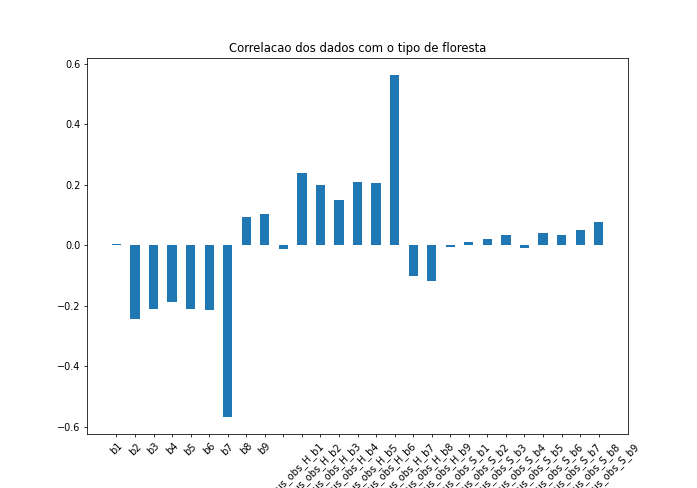

In [10]:
plt.figure(figsize = (10,7))
labels = data.keys()[:-1]
weight = data.corr()['class'].to_numpy()[:-1]
plt.bar( labels, weight, width= 0.5);
plt.title('Correlacao dos dados com o tipo de floresta')
plt.xticks(rotation=45);

In [11]:
weight.sort()
aux = weight > 0
positiveLabels = labels[aux]
negativeLabels = labels[aux == False]
positiveWeight = weight[weight > 0]
negativeWeight = weight[weight < 0]

## Positive correlation

<IPython.core.display.Javascript object>


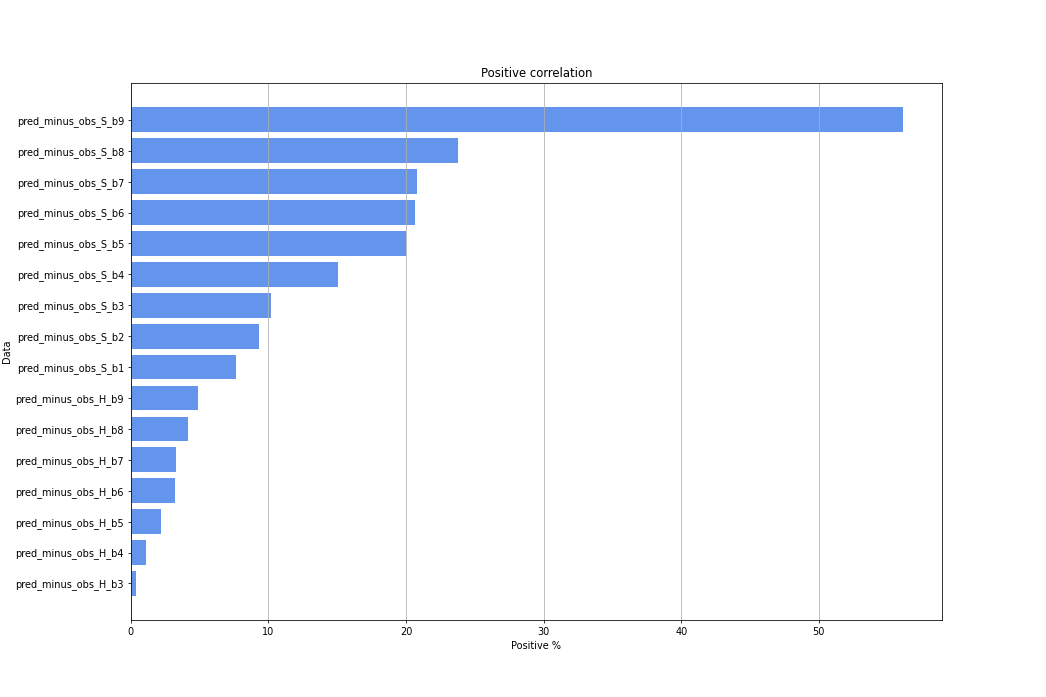

In [12]:
plt.figure(figsize = (15,10));

plt.grid(axis='x');
plt.barh(positiveLabels, positiveWeight*100, color='#6495ED');
plt.title('Positive correlation');
plt.xlabel('Positive %');
plt.ylabel('Data');

## Negative correlation

<IPython.core.display.Javascript object>


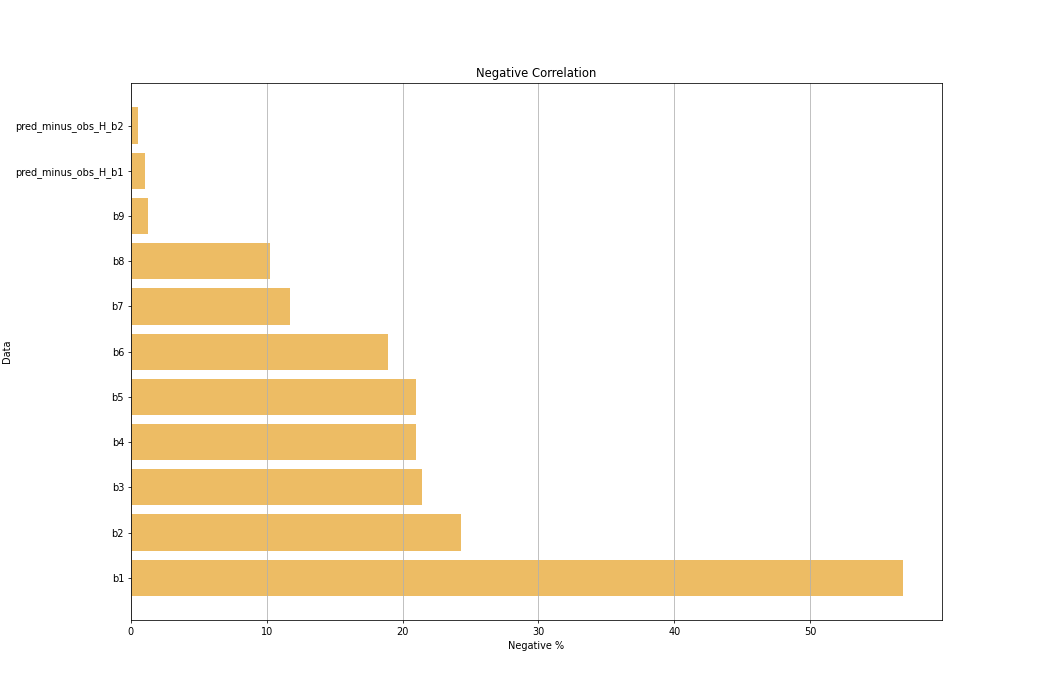

In [13]:
plt.figure(figsize = (15,10));
plt.grid(axis='x');
plt.barh(negativeLabels, negativeWeight*-100, color='#edbc64');
plt.title('Negative Correlation')
plt.xlabel('Negative %');
plt.ylabel('Data');


# Geral correlation
how much each data influences the differentiation between forest 

<IPython.core.display.Javascript object>


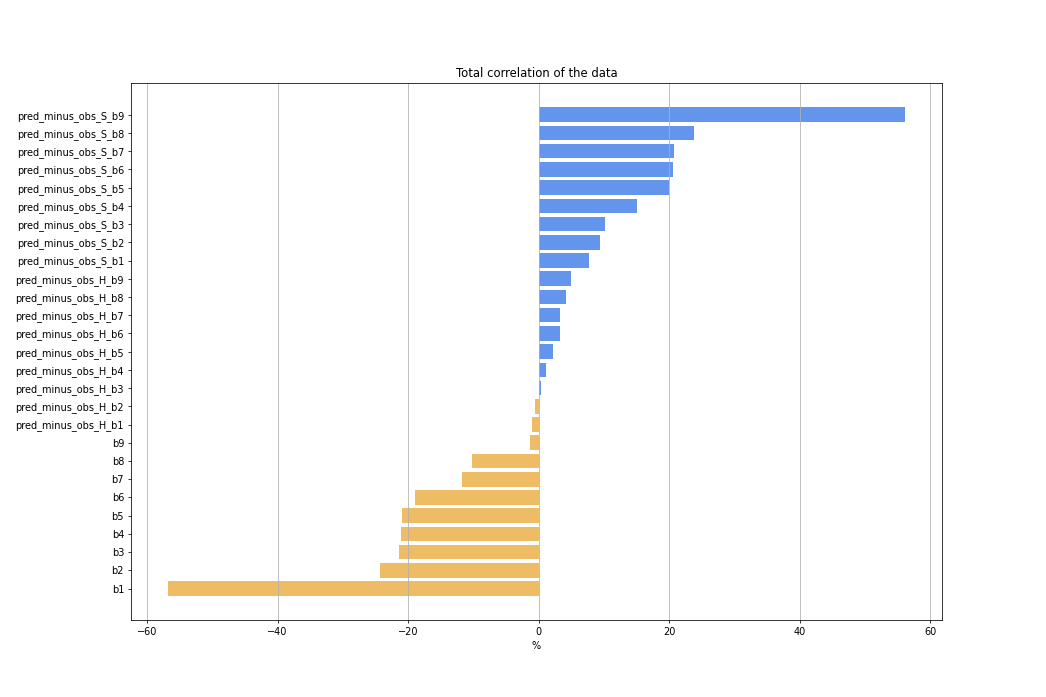

In [14]:
plt.figure(figsize = (15,10));
plt.barh(negativeLabels, negativeWeight*100, color='#edbc64');
plt.barh(positiveLabels, positiveWeight*100, color='#6495ED');
plt.grid(axis='x');
plt.xlabel('%');
plt.title('Total correlation of the data');

del (weight,
positiveLabels,
negativeLabels,
positiveWeight,
negativeWeight)

## Preparing the data for the model

In [15]:
dataLabel      = data['class'].to_numpy();
dataParameters = data.drop('class', axis=1).to_numpy();

Temos 4 tipos de dados, vamos convertelos para numeros interios:
- [1 0 0 0] -> 'd'
- [0 1 0 0] -> 'h'
- [0 0 1 0] -> 'o'
- [0 0 0 1] -> 's'

In [16]:
dataLabel = tf.keras.utils.to_categorical(dataLabel, 4)

In [17]:
from sklearn.model_selection import train_test_split

dataParametersTrain, datParametersTest, dataLabelTrain ,dataLabelTest = train_test_split(dataParameters,
                                                                                      dataLabel,
                                                                                      test_size=0.05,
                                                                                      random_state=5)

nEpochs      = 600
percentSplit = 0.15

In [18]:
data.shape

(198, 28)

## Let's rock 

In [19]:
modelo = tf.keras.models.Sequential()

modelo.add( tf.keras.layers.Dense( units = 200, activation = 'tanh', input_shape = (27,) ))
modelo.add(tf.keras.layers.Dropout(0.3))
modelo.add(tf.keras.layers.Dense( units = 200, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.3))
modelo.add(tf.keras.layers.Dense( units = 150, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.3))
modelo.add(tf.keras.layers.Dense( units = 150, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.3))
modelo.add(tf.keras.layers.Dense( units = 150, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dense( units = 150, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.3))
modelo.add(tf.keras.layers.Dense( units = 4  , activation = 'softmax' ))

modelo.compile(optimizer = 'Adamax' ,
               loss='CategoricalCrossentropy',
               metrics=['CategoricalAccuracy'])

hist = modelo.fit(dataParametersTrain,
                  dataLabelTrain,
                  epochs = nEpochs,
                  batch_size = 20,
                  validation_split = percentSplit,
                  verbose =1)


Epoch 1/600
8/8 [==============================] - 4s 197ms/step - loss: 1.4296 - categorical_accuracy: 0.3021 - val_loss: 0.9858 - val_categorical_accuracy: 0.6207
Epoch 2/600
8/8 [==============================] - 1s 64ms/step - loss: 1.1591 - categorical_accuracy: 0.5179 - val_loss: 0.5568 - val_categorical_accuracy: 0.8621
Epoch 3/600
8/8 [==============================] - 0s 50ms/step - loss: 0.8450 - categorical_accuracy: 0.6560 - val_loss: 0.4622 - val_categorical_accuracy: 0.8276
Epoch 4/600
8/8 [==============================] - 0s 63ms/step - loss: 0.6470 - categorical_accuracy: 0.7806 - val_loss: 0.2785 - val_categorical_accuracy: 0.9310
Epoch 5/600
8/8 [==============================] - 1s 78ms/step - loss: 0.5640 - categorical_accuracy: 0.8516 - val_loss: 0.1745 - val_categorical_accuracy: 0.9655
Epoch 6/600
8/8 [==============================] - 1s 69ms/step - loss: 0.3903 - categorical_accuracy: 0.8811 - val_loss: 0.1312 - val_categorical_accuracy: 1.0000
Epoch 7/600
8/8

Epoch 51/600
8/8 [==============================] - 0s 49ms/step - loss: 0.0457 - categorical_accuracy: 0.9783 - val_loss: 0.0196 - val_categorical_accuracy: 1.0000
Epoch 52/600
8/8 [==============================] - 0s 66ms/step - loss: 0.0313 - categorical_accuracy: 0.9894 - val_loss: 0.0075 - val_categorical_accuracy: 1.0000
Epoch 53/600
8/8 [==============================] - 1s 72ms/step - loss: 0.0551 - categorical_accuracy: 0.9740 - val_loss: 0.0053 - val_categorical_accuracy: 1.0000
Epoch 54/600
8/8 [==============================] - 0s 56ms/step - loss: 0.0437 - categorical_accuracy: 0.9848 - val_loss: 0.0085 - val_categorical_accuracy: 1.0000
Epoch 55/600
8/8 [==============================] - 0s 44ms/step - loss: 0.0251 - categorical_accuracy: 0.9956 - val_loss: 0.0457 - val_categorical_accuracy: 0.9655
Epoch 56/600
8/8 [==============================] - 0s 47ms/step - loss: 0.1032 - categorical_accuracy: 0.9470 - val_loss: 0.0203 - val_categorical_accuracy: 1.0000
Epoch 57/6

8/8 [==============================] - 0s 62ms/step - loss: 0.0219 - categorical_accuracy: 0.9883 - val_loss: 0.0411 - val_categorical_accuracy: 0.9655
Epoch 101/600
8/8 [==============================] - 0s 65ms/step - loss: 0.0333 - categorical_accuracy: 0.9745 - val_loss: 0.0108 - val_categorical_accuracy: 1.0000
Epoch 102/600
8/8 [==============================] - 1s 73ms/step - loss: 0.0160 - categorical_accuracy: 0.9986 - val_loss: 7.5503e-04 - val_categorical_accuracy: 1.0000
Epoch 103/600
8/8 [==============================] - 0s 49ms/step - loss: 0.0381 - categorical_accuracy: 0.9655 - val_loss: 4.2847e-04 - val_categorical_accuracy: 1.0000
Epoch 104/600
8/8 [==============================] - 0s 45ms/step - loss: 0.0298 - categorical_accuracy: 0.9811 - val_loss: 4.5760e-04 - val_categorical_accuracy: 1.0000
Epoch 105/600
8/8 [==============================] - 0s 52ms/step - loss: 0.0088 - categorical_accuracy: 0.9947 - val_loss: 0.0015 - val_categorical_accuracy: 1.0000
Epoch 

8/8 [==============================] - 1s 71ms/step - loss: 0.0138 - categorical_accuracy: 0.9958 - val_loss: 0.0145 - val_categorical_accuracy: 1.0000
Epoch 150/600
8/8 [==============================] - 0s 42ms/step - loss: 0.0348 - categorical_accuracy: 0.9811 - val_loss: 0.0123 - val_categorical_accuracy: 1.0000
Epoch 151/600
8/8 [==============================] - 0s 66ms/step - loss: 0.0292 - categorical_accuracy: 0.9958 - val_loss: 0.0448 - val_categorical_accuracy: 0.9655
Epoch 152/600
8/8 [==============================] - 1s 69ms/step - loss: 0.0213 - categorical_accuracy: 0.9944 - val_loss: 0.0798 - val_categorical_accuracy: 0.9655
Epoch 153/600
8/8 [==============================] - 0s 36ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0585 - val_categorical_accuracy: 0.9655
Epoch 154/600
8/8 [==============================] - 0s 55ms/step - loss: 0.0093 - categorical_accuracy: 1.0000 - val_loss: 0.0373 - val_categorical_accuracy: 0.9655
Epoch 155/600
8/8 

8/8 [==============================] - 0s 54ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.0027 - val_categorical_accuracy: 1.0000
Epoch 199/600
8/8 [==============================] - 0s 57ms/step - loss: 0.0049 - categorical_accuracy: 0.9958 - val_loss: 9.1555e-04 - val_categorical_accuracy: 1.0000
Epoch 200/600
8/8 [==============================] - 0s 45ms/step - loss: 0.0352 - categorical_accuracy: 0.9841 - val_loss: 0.0068 - val_categorical_accuracy: 1.0000
Epoch 201/600
8/8 [==============================] - 0s 51ms/step - loss: 0.0358 - categorical_accuracy: 0.9869 - val_loss: 0.0015 - val_categorical_accuracy: 1.0000
Epoch 202/600
8/8 [==============================] - 0s 60ms/step - loss: 0.0216 - categorical_accuracy: 0.9925 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 203/600
8/8 [==============================] - 0s 59ms/step - loss: 0.0853 - categorical_accuracy: 0.9811 - val_loss: 0.0020 - val_categorical_accuracy: 1.0000
Epoch 204/600


Epoch 247/600
8/8 [==============================] - 0s 57ms/step - loss: 0.0082 - categorical_accuracy: 1.0000 - val_loss: 2.7456e-04 - val_categorical_accuracy: 1.0000
Epoch 248/600
8/8 [==============================] - 0s 53ms/step - loss: 0.0046 - categorical_accuracy: 1.0000 - val_loss: 1.7758e-04 - val_categorical_accuracy: 1.0000
Epoch 249/600
8/8 [==============================] - 0s 60ms/step - loss: 0.0195 - categorical_accuracy: 0.9828 - val_loss: 2.9364e-04 - val_categorical_accuracy: 1.0000
Epoch 250/600
8/8 [==============================] - 0s 54ms/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 4.9340e-04 - val_categorical_accuracy: 1.0000
Epoch 251/600
8/8 [==============================] - 0s 59ms/step - loss: 0.0072 - categorical_accuracy: 1.0000 - val_loss: 3.2893e-04 - val_categorical_accuracy: 1.0000
Epoch 252/600
8/8 [==============================] - 1s 70ms/step - loss: 0.0168 - categorical_accuracy: 1.0000 - val_loss: 1.4769e-04 - val_categoric

8/8 [==============================] - 0s 35ms/step - loss: 0.0745 - categorical_accuracy: 0.9811 - val_loss: 0.0087 - val_categorical_accuracy: 1.0000
Epoch 296/600
8/8 [==============================] - 0s 43ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_categorical_accuracy: 0.9655
Epoch 297/600
8/8 [==============================] - 0s 40ms/step - loss: 0.0206 - categorical_accuracy: 0.9944 - val_loss: 0.0074 - val_categorical_accuracy: 1.0000
Epoch 298/600
8/8 [==============================] - 0s 41ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 6.8628e-04 - val_categorical_accuracy: 1.0000
Epoch 299/600
8/8 [==============================] - 0s 40ms/step - loss: 0.0043 - categorical_accuracy: 1.0000 - val_loss: 3.0748e-04 - val_categorical_accuracy: 1.0000
Epoch 300/600
8/8 [==============================] - 0s 43ms/step - loss: 0.0141 - categorical_accuracy: 0.9842 - val_loss: 2.0504e-04 - val_categorical_accuracy: 1.0000
Epoch 

Epoch 344/600
8/8 [==============================] - 0s 27ms/step - loss: 4.5744e-04 - categorical_accuracy: 1.0000 - val_loss: 2.4378e-04 - val_categorical_accuracy: 1.0000
Epoch 345/600
8/8 [==============================] - 0s 39ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 3.6881e-04 - val_categorical_accuracy: 1.0000
Epoch 346/600
8/8 [==============================] - 0s 37ms/step - loss: 6.9342e-04 - categorical_accuracy: 1.0000 - val_loss: 5.0944e-04 - val_categorical_accuracy: 1.0000
Epoch 347/600
8/8 [==============================] - 0s 32ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 5.9874e-04 - val_categorical_accuracy: 1.0000
Epoch 348/600
8/8 [==============================] - 0s 42ms/step - loss: 0.0235 - categorical_accuracy: 0.9842 - val_loss: 4.0637e-04 - val_categorical_accuracy: 1.0000
Epoch 349/600
8/8 [==============================] - 0s 38ms/step - loss: 3.7926e-04 - categorical_accuracy: 1.0000 - val_loss: 3.5303e-04 - v

8/8 [==============================] - 0s 33ms/step - loss: 5.0353e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0047 - val_categorical_accuracy: 1.0000
Epoch 393/600
8/8 [==============================] - 0s 32ms/step - loss: 0.0098 - categorical_accuracy: 1.0000 - val_loss: 0.0034 - val_categorical_accuracy: 1.0000
Epoch 394/600
8/8 [==============================] - 0s 36ms/step - loss: 5.9002e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0015 - val_categorical_accuracy: 1.0000
Epoch 395/600
8/8 [==============================] - 0s 33ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 7.5249e-04 - val_categorical_accuracy: 1.0000
Epoch 396/600
8/8 [==============================] - 0s 32ms/step - loss: 0.0049 - categorical_accuracy: 1.0000 - val_loss: 7.8271e-04 - val_categorical_accuracy: 1.0000
Epoch 397/600
8/8 [==============================] - 0s 35ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 1.8379e-04 - val_categorical_accuracy: 1.000

8/8 [==============================] - 0s 45ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 441/600
8/8 [==============================] - 0s 39ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 442/600
8/8 [==============================] - 0s 38ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 3.9542e-04 - val_categorical_accuracy: 1.0000
Epoch 443/600
8/8 [==============================] - 0s 42ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 2.3199e-04 - val_categorical_accuracy: 1.0000
Epoch 444/600
8/8 [==============================] - 0s 36ms/step - loss: 0.0025 - categorical_accuracy: 0.9978 - val_loss: 1.5166e-04 - val_categorical_accuracy: 1.0000
Epoch 445/600
8/8 [==============================] - 0s 36ms/step - loss: 0.0056 - categorical_accuracy: 0.9986 - val_loss: 1.1220e-04 - val_categorical_accuracy: 1.0000
Ep

8/8 [==============================] - 0s 44ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 1.5021e-04 - val_categorical_accuracy: 1.0000
Epoch 489/600
8/8 [==============================] - 0s 41ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 1.5959e-04 - val_categorical_accuracy: 1.0000
Epoch 490/600
8/8 [==============================] - 0s 46ms/step - loss: 0.0047 - categorical_accuracy: 0.9969 - val_loss: 2.0358e-04 - val_categorical_accuracy: 1.0000
Epoch 491/600
8/8 [==============================] - 0s 38ms/step - loss: 0.0092 - categorical_accuracy: 0.9958 - val_loss: 8.4933e-04 - val_categorical_accuracy: 1.0000
Epoch 492/600
8/8 [==============================] - 0s 40ms/step - loss: 0.0050 - categorical_accuracy: 1.0000 - val_loss: 0.0012 - val_categorical_accuracy: 1.0000
Epoch 493/600
8/8 [==============================] - 0s 23ms/step - loss: 7.6407e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0012 - val_categorical_accuracy: 1.000

8/8 [==============================] - 0s 26ms/step - loss: 0.0085 - categorical_accuracy: 0.9986 - val_loss: 0.0019 - val_categorical_accuracy: 1.0000
Epoch 537/600
8/8 [==============================] - 0s 38ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 5.5537e-04 - val_categorical_accuracy: 1.0000
Epoch 538/600
8/8 [==============================] - 0s 39ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 7.2783e-04 - val_categorical_accuracy: 1.0000
Epoch 539/600
8/8 [==============================] - 0s 38ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0010 - val_categorical_accuracy: 1.0000
Epoch 540/600
8/8 [==============================] - 0s 23ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 7.6402e-04 - val_categorical_accuracy: 1.0000
Epoch 541/600
8/8 [==============================] - 0s 25ms/step - loss: 0.0034 - categorical_accuracy: 0.9969 - val_loss: 7.2644e-04 - val_categorical_accuracy: 1.0000
Ep

8/8 [==============================] - 0s 40ms/step - loss: 8.7262e-04 - categorical_accuracy: 1.0000 - val_loss: 5.1240e-05 - val_categorical_accuracy: 1.0000
Epoch 585/600
8/8 [==============================] - 0s 39ms/step - loss: 3.7409e-04 - categorical_accuracy: 1.0000 - val_loss: 7.1834e-05 - val_categorical_accuracy: 1.0000
Epoch 586/600
8/8 [==============================] - 0s 40ms/step - loss: 2.8809e-04 - categorical_accuracy: 1.0000 - val_loss: 8.4981e-05 - val_categorical_accuracy: 1.0000
Epoch 587/600
8/8 [==============================] - 0s 33ms/step - loss: 2.0709e-04 - categorical_accuracy: 1.0000 - val_loss: 9.0937e-05 - val_categorical_accuracy: 1.0000
Epoch 588/600
8/8 [==============================] - 0s 36ms/step - loss: 6.2768e-04 - categorical_accuracy: 1.0000 - val_loss: 9.4843e-05 - val_categorical_accuracy: 1.0000
Epoch 589/600
8/8 [==============================] - 0s 37ms/step - loss: 3.9932e-04 - categorical_accuracy: 1.0000 - val_loss: 9.5729e-05 - val

In [20]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               5600      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               2

<IPython.core.display.Javascript object>


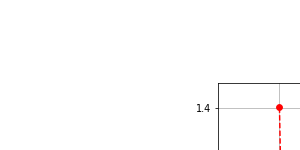

In [21]:
plt.figure(figsize=(25,10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['loss'], 'o', color='red')
plt.plot(hist.history['loss'], '--', color='red')
plt.grid()

<IPython.core.display.Javascript object>


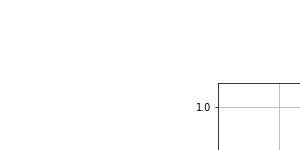

In [22]:
plt.figure(figsize=(25,10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['categorical_accuracy'], 'o', color='green')
plt.plot(hist.history['categorical_accuracy'], '--', color='green')
plt.grid()

In [23]:
from sklearn.metrics import r2_score
prediction =  modelo.predict(datParametersTest)
filtredPrediction=[]
p = np.around(prediction, decimals=0)
print('{:25}:{:.2f}'.format('Predictions R2', r2_score(prediction,dataLabelTest)))
print('{:25}:{:.2f}'.format('Rounded predictions R2', r2_score(p,dataLabelTest)))

Predictions R2           :1.00
Rounded predictions R2   :1.00


# Model validation

In [24]:
data = pd.read_csv('data/testing.csv')

In [25]:
dataLabel = data['class']
dataLabel = data['class'].to_numpy()
dataLabel[dataLabel == 'd '] = 0
dataLabel[dataLabel == 'h '] = 1
dataLabel[dataLabel == 'o '] = 2
dataLabel[dataLabel == 's '] = 3

In [26]:
data = data.drop('class', axis=1)
data['class'] = dataLabel
data['class'] = pd.to_numeric(data['class'])

In [27]:
dataLabel      = data['class'].to_numpy()
dataLabel = tf.keras.utils.to_categorical(dataLabel, 4)

dataParameters = data.drop('class', axis=1).to_numpy()
prediction =  modelo.predict(dataParameters)
filtredPrediction = []
p = np.around(prediction, decimals=0)
print('{:25}:{:.2f}'.format('Predictions R2', r2_score(prediction, dataLabel)))
print('{:25}:{:.2f}'.format('Rounded predictions R2', r2_score(p, dataLabel)))

Predictions R2           :0.50
Rounded predictions R2   :0.50
